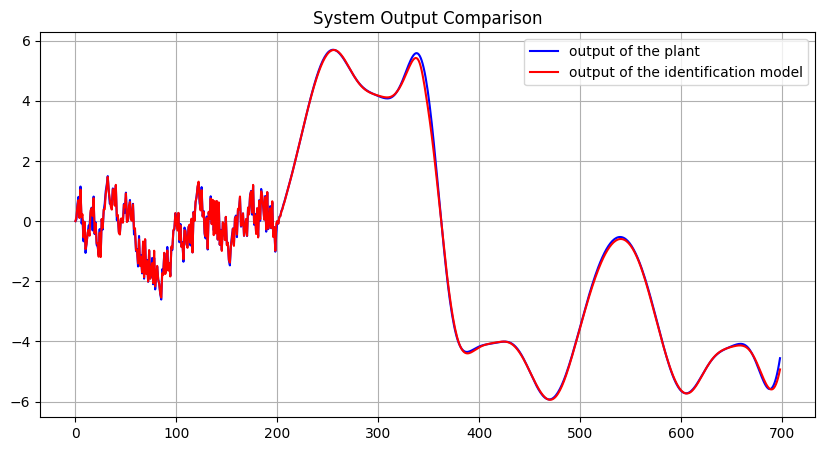

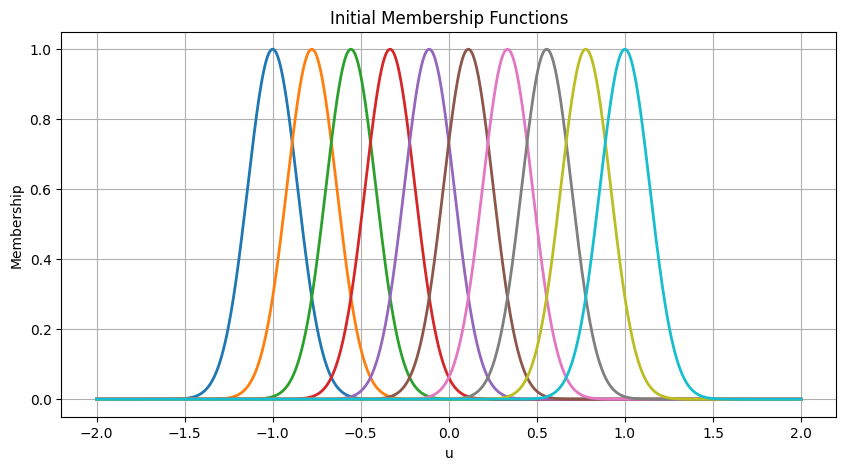

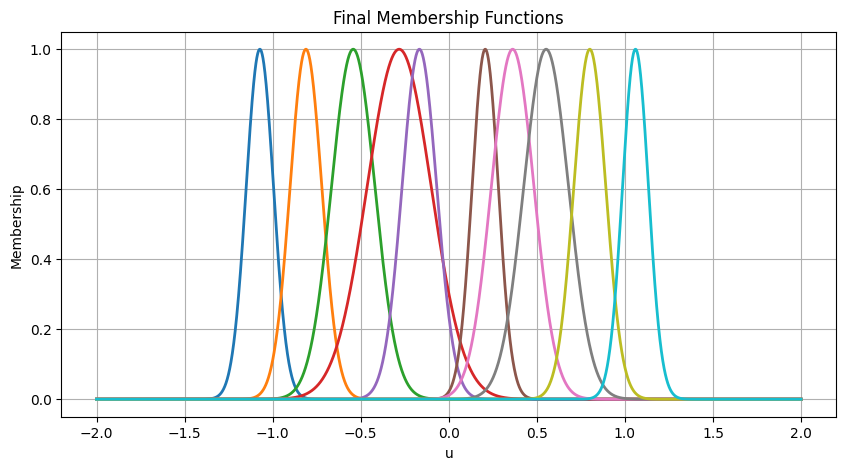

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# initializing
M = 10  # number of mfs
num_training = 200
total_num = 700
landa = 0.1

# preallocate arrays
x_bar = np.zeros((num_training, M))
g_bar = np.zeros((num_training, M))
sigma = np.zeros((num_training, M))
y = np.zeros(total_num)
u = np.zeros(total_num)
x = np.zeros(total_num)
y_hat = np.zeros(total_num)
f_hat = np.zeros(total_num)
g_u = np.zeros(total_num)

# initial random input
u[0] = -1 + 2 * np.random.rand()
y[0] = 0
g_u[0] = 0.6 * np.sin(np.pi * u[0]) + 0.3 * np.sin(3 * np.pi * u[0]) + 0.1 * np.sin(5 * np.pi * u[0])
f_hat[0] = g_u[0]

# first step design
u_min = -1
u_max = 1
h = (u_max - u_min) / (M-1)
for k in range(M):
    x_bar[0, k] = u_min + h * k
    g_bar[0, k] = 0.6 * np.sin(np.pi * x_bar[0, k]) + 0.3 * np.sin(3 * np.pi * x_bar[0, k]) + 0.1 * np.sin(5 * np.pi * x_bar[0, k])
sigma[0, :] = (np.max(x_bar[0, :]) - np.min(x_bar[0, :])) / M

# training phase
for q in range(1, num_training):
    x[q] = -1 + 2 * np.random.rand()
    g_u[q] = 0.6 * np.sin(np.pi * x[q]) + 0.3 * np.sin(3 * np.pi * x[q]) + 0.1 * np.sin(5 * np.pi * x[q])
    z = np.exp(-np.square((x[q] - x_bar[q-1, :]) / sigma[q-1, :]))
    b = np.sum(z)
    a = np.dot(z, g_bar[q-1, :])
    f_hat[q] = a / b
    y[q] = 0.3 * y[q-1] + 0.6 * y[q-2] + g_u[q]
    y_hat[q] = 0.3 * y[q-1] + 0.6 * y[q-2] + f_hat[q]
    for l in range(M):
        g_bar[q, l] = g_bar[q-1, l] - landa * (f_hat[q] - g_u[q]) * z[l] / b
        x_bar[q, l] = x_bar[q-1, l] - landa * ((f_hat[q] - g_u[q]) * (g_bar[q-1, l] - a / b) * z[l] * 2 * (x[q] - x_bar[q-1, l])) / (sigma[q-1, l]**2)
        sigma[q, l] = sigma[q-1, l] - landa * ((f_hat[q] - g_u[q]) * (g_bar[q-1, l] - a / b) * z[l] * 2 * (x[q] - x_bar[q-1, l])**2) / (sigma[q-1, l]**3)

# final values after training
x_bar_final = x_bar[num_training - 1, :]
sigma_final = sigma[num_training - 1, :]
g_bar_final = g_bar[num_training - 1, :]

# network output after training
for q in range(num_training, total_num - 1):
    x[q] = np.sin(2 * np.pi * q / total_num)
    g_u[q] = 0.6 * np.sin(np.pi * x[q]) + 0.3 * np.sin(3 * np.pi * x[q]) + 0.1 * np.sin(5 * np.pi * x[q])
    z = np.exp(-np.square((x[q] - x_bar_final) / sigma_final))
    b = np.sum(z)
    a = np.dot(z, g_bar_final)
    f_hat[q] = a / b
    y[q+1] = 0.3 * y[q] + 0.6 * y[q-1] + g_u[q]
    y_hat[q+1] = 0.3 * y[q] + 0.6 * y[q-1] + f_hat[q]

# plotting
plt.figure(figsize=(10, 5))
plt.plot(y[:-1], 'b', label='output of the plant')
plt.plot(y_hat[:-1], 'r', label='output of the identification model')
plt.title('System Output Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
xp = np.linspace(-2, 2, 4000)
for l in range(M):
    miu_x = np.exp(-((xp - x_bar[0, l])**2) / (sigma[0, l]**2))
    plt.plot(xp, miu_x, linewidth=2)
plt.title('Initial Membership Functions')
plt.xlabel('u')
plt.ylabel("Membership")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for l in range(M):
    miu_x = np.exp(-((xp - x_bar_final[l])**2) / (sigma_final[l]**2))
    plt.plot(xp, miu_x, linewidth=2)
plt.title('Final Membership Functions')
plt.xlabel('u')
plt.ylabel("Membership")
plt.grid(True)
plt.show()